# Working with GDP data

### Introduction
This notebook aims to analyze the velocity data from drifters within the tropical Atlantic Ocean. 
The current variables are represented here by $ve$, $vn$, and we have added the $sst$.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221

## Import library

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation


import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc

## File location and name               

In [2]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);

## Read Drifter Data

In [3]:
ds

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.0
    wmo_platform_code:          4600620

## Extract coordinates and variables

In [4]:
print(ds)
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values 

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.

## Determining Minimum and Maximum Latitude, Longitude, Time, ve, vn, and sst 
# for Mapping

In [5]:
print("min_lat = ", min(ds.latitude.values))
print("max_lat = ", max(ds.latitude.values))
print("min_lon = ", min(ds.longitude.values))
print("max_lon = ", max(ds.longitude.values))
print("min_time = ", min(ds.time.values))
print("max_time = ", max(ds.time.values))
print("min_ve = ", min(ds.ve.values))
print("max_ve = ", max(ds.ve.values))
print("min_vn = ", min(ds.vn.values))
print("max_vn = ", max(ds.vn.values))
print("min_sst = ", min(ds.sst.values))
print("max_sst = ", max(ds.sst.values))

min_lat =  -20.0
max_lat =  20.0
min_lon =  -70.0
max_lon =  10.099
min_time =  2023-01-01T00:00:00.000000000
max_time =  2023-10-14T18:00:00.000000000
min_ve =  -999999.0
max_ve =  1.2861
min_vn =  -999999.0
max_vn =  1.48393
min_sst =  18.084
max_sst =  31.788


## let's plot the ve, vn and sst

## Position of drifters over time

## At the stat of their deploymennt : note that we have approximatively 221 Drifters in our study zone

## Drifters positions On all the period

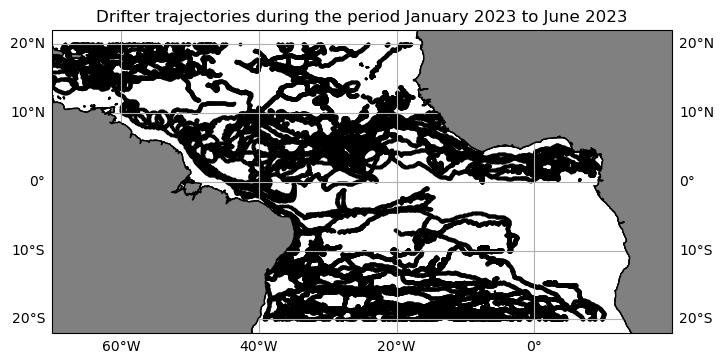

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude =0))

ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_label=False
ax.add_feature(cfeature.LAND, facecolor='0.5',
               zorder=2, edgecolor='k')
region=[-70,20,-16,16]
ax.set_extent(region)

sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    color='k',
    s=3,
    transform=ccrs.PlateCarree())
# plt.plot(ds.longitude.values,  ds.latitude.values, color='b', linestyle='-')

ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# fig.colorbar(sc, orientation='horizontal', shrink=0.4,label='Status of Drifter Array')
ax.set_title('Drifter trajectories during the period January 2023 to June 2023')
plt.savefig("fig1 mode.png")

## case of ve

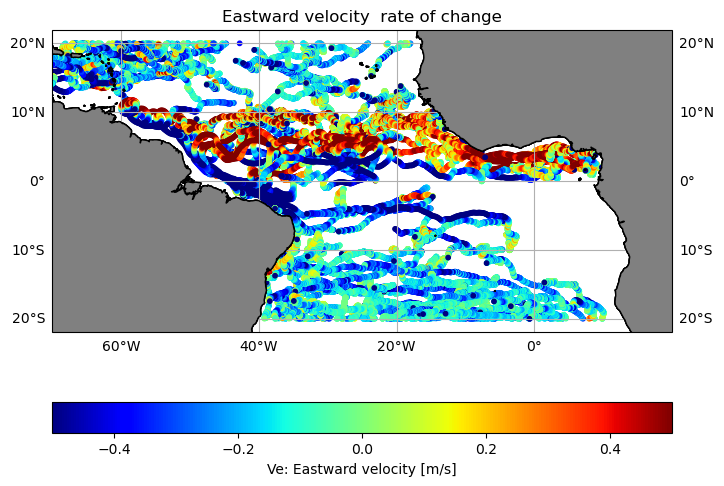

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude =0))

ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_label=False
ax.add_feature(cfeature.LAND, facecolor='0.5',
               zorder=2, edgecolor='k')
region=[-70,20,-16,16]
ax.set_extent(region)

sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.ve.values,
    vmin=-0.5,
    vmax=0.5,
    transform=ccrs.PlateCarree(),
    cmap='jet')
, edgecolor='black', facecolor='green'
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
fig.colorbar(sc, orientation='horizontal', shrink=1,label='Ve: Eastward velocity [m/s]')
ax.set_title('Eastward velocity  rate of change')
plt.savefig("fig2 mode.png")

## case of vn

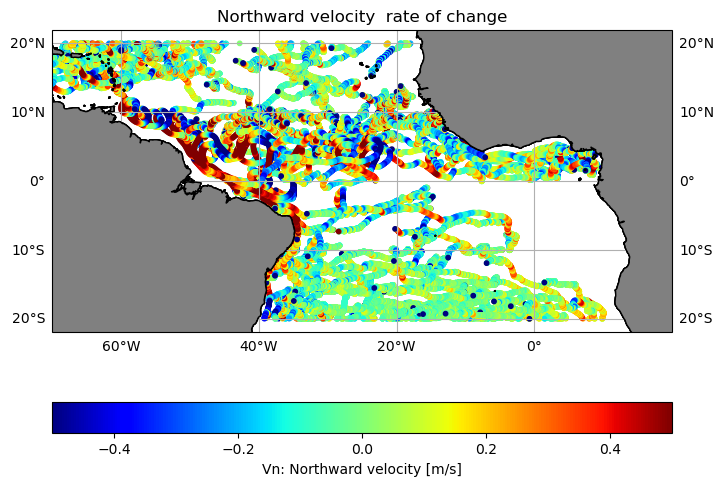

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude =0))

ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_label=False
ax.add_feature(cfeature.LAND, facecolor='0.5',
               zorder=2, edgecolor='k')
region=[-70,20,-16,16]
ax.set_extent(region)

sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.vn.values,
    vmin=-0.5,
    vmax=0.5,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
fig.colorbar(sc, orientation='horizontal', shrink=1,label='Vn: Northward velocity [m/s]')
ax.set_title('Northward velocity  rate of change')
plt.savefig("fig3 mode.png")

## case of sst

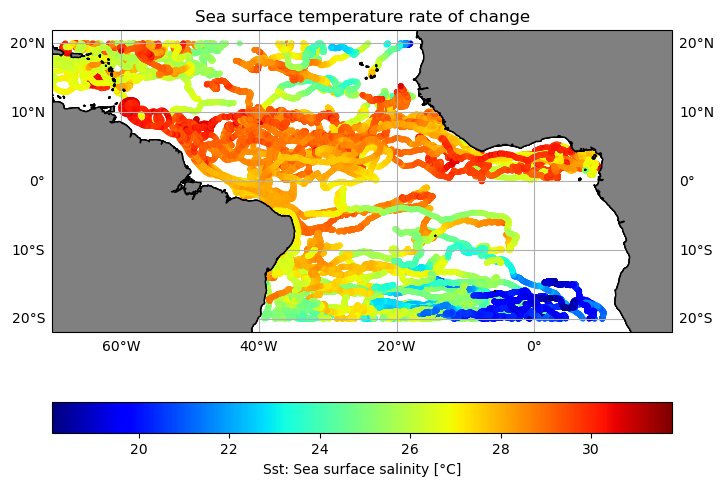

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude =0))

ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_label=False
ax.add_feature(cfeature.LAND, facecolor='0.5',
               zorder=2, edgecolor='k')
region=[-70,20,-16,16]
ax.set_extent(region)

sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.sst.values,
    vmin=18.084,
    vmax=31.788,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
fig.colorbar(sc, orientation='horizontal', shrink=1,label='Sst: Sea surface salinity [°C]')
ax.set_title('Sea surface temperature rate of change')
plt.savefig("fig4 mode.png")